In [1]:
import torch
from torch.distributions import multinomial#多项分布
from d2l import torch as d2l

In [2]:
fair_probs=torch.ones([6])/6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [5]:
count=multinomial.Multinomial(1000,fair_probs).sample()
count,count/1000

(tensor([170., 165., 166., 175., 170., 154.]),
 tensor([0.1700, 0.1650, 0.1660, 0.1750, 0.1700, 0.1540]))

In [9]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
counts.shape, counts, cum_counts.shape, cum_counts


(torch.Size([500, 6]),
 tensor([[3., 1., 1., 3., 1., 1.],
         [0., 2., 0., 2., 4., 2.],
         [1., 1., 3., 3., 2., 0.],
         ...,
         [1., 0., 2., 1., 3., 3.],
         [1., 0., 4., 3., 0., 2.],
         [0., 2., 3., 2., 1., 2.]]),
 torch.Size([500, 6]),
 tensor([[  3.,   1.,   1.,   3.,   1.,   1.],
         [  3.,   3.,   1.,   5.,   5.,   3.],
         [  4.,   4.,   4.,   8.,   7.,   3.],
         ...,
         [823., 827., 842., 788., 859., 841.],
         [824., 827., 846., 791., 859., 843.],
         [824., 829., 849., 793., 860., 845.]]))

tensor([[0.3000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000],
        [0.1500, 0.1500, 0.0500, 0.2500, 0.2500, 0.1500],
        [0.1333, 0.1333, 0.1333, 0.2667, 0.2333, 0.1000],
        ...,
        [0.1653, 0.1661, 0.1691, 0.1582, 0.1725, 0.1689],
        [0.1651, 0.1657, 0.1695, 0.1585, 0.1721, 0.1689],
        [0.1648, 0.1658, 0.1698, 0.1586, 0.1720, 0.1690]]) torch.Size([500, 6])


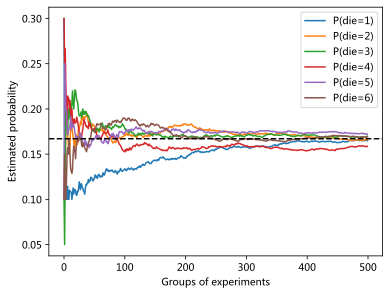

In [13]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates,estimates.shape)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
